In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


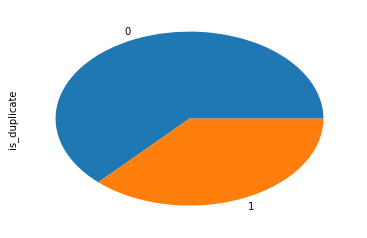

In [4]:
train_df.is_duplicate.value_counts().plot(kind='pie')

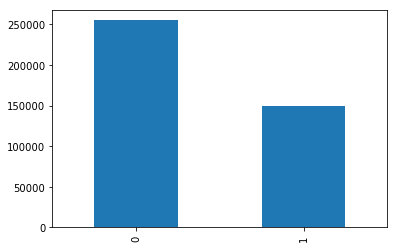

In [5]:
train_df.is_duplicate.value_counts().plot(kind='bar')

In [6]:
train_df.shape

(404290, 6)

In [7]:
df=train_df.head(1000)

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
df.is_duplicate.value_counts()

0    620
1    380
Name: is_duplicate, dtype: int64

In [10]:
df[df.is_duplicate==1].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [11]:
df[df.is_duplicate==0].head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
df.question1[1]



'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [13]:
ps = PorterStemmer()
r1 = re.sub("[^a-zA-z]"," ",df.question1[1])
r1 = r1.lower()
#r1
r1 = [ps.stem(word) for word in r1.split() if word not in set(stopwords.words('english'))]
r1 = " ".join(r1)
r1

u'stori kohinoor koh noor diamond'

In [14]:
def preprocess_text(qns):
    r1 = re.sub("[^a-zA-z]"," ",qns)
    r1 = r1.lower()
    r1 = [ps.stem(word) for word in r1.split() if word not in set(stopwords.words('english'))]
    r1 = " ".join(r1)
    return r1

In [15]:
df['q1_rev'] = df['question1'].apply(preprocess_text)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df[['q1_rev','question1']].head()

,q1_rev,question1
0,step step guid invest share market india,What is the step by step guide to invest in sh...
1,stori kohinoor koh noor diamond,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,increas speed internet connect use vpn,How can I increase the speed of my internet co...
3,mental lone solv,Why am I mentally very lonely? How can I solve...
4,one dissolv water quikli sugar salt methan car...,"Which one dissolve in water quikly sugar, salt..."


In [17]:
df['q2_rev'] = df['question2'].apply(preprocess_text)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
df[['q2_rev','question2']].head()

,q2_rev,question2
0,step step guid invest share market,What is the step by step guide to invest in sh...
1,would happen indian govern stole kohinoor koh ...,What would happen if the Indian government sto...
2,internet speed increas hack dn,How can Internet speed be increased by hacking...
3,find remaind [math] ^ [ math] divid,Find the remainder when [math]23^{24}[/math] i...
4,fish would surviv salt water,Which fish would survive in salt water?


In [19]:
df[['q1_rev','q2_rev','is_duplicate']].head()

,q1_rev,q2_rev,is_duplicate
0,step step guid invest share market india,step step guid invest share market,0
1,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0
2,increas speed internet connect use vpn,internet speed increas hack dn,0
3,mental lone solv,find remaind [math] ^ [ math] divid,0
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [20]:
df[['q1_rev','q2_rev','is_duplicate']][df.is_duplicate==1].head()

,q1_rev,q2_rev,is_duplicate
5,astrolog capricorn sun cap moon cap rise say,tripl capricorn sun moon ascend capricorn say,1
7,good geologist,great geologist,1
11,read find youtub comment,see youtub comment,1
12,make physic easi learn,make physic easi learn,1
13,first sexual experi like,first sexual experi,1


In [21]:
df.q1_rev[1],df.q1_rev[1]
#df.q1_rev[5],df.q1_rev[5]

(u'stori kohinoor koh noor diamond', u'stori kohinoor koh noor diamond')

In [22]:
#df.q1_rev[1],df.q1_rev[1]
#(u'stori kohinoor koh noor diamond', u'stori kohinoor koh noor diamond')
# different qns
nltk.edit_distance(df.q1_rev[1],df.q2_rev[1])

34

In [23]:
df.q1_rev[5],df.q2_rev[5]

(u'astrolog capricorn sun cap moon cap rise say',
 u'tripl capricorn sun moon ascend capricorn say')

In [24]:
#df.q1_rev[5],df.q1_rev[5]
#(u'astrolog capricorn sun cap moon cap rise say',
# u'tripl capricorn sun moon ascend capricorn say')
#similar qns
nltk.edit_distance(df.q1_rev[5],df.q2_rev[5])

20

In [25]:
# similarity b/w same input == 0
nltk.edit_distance(df.q1_rev[5],df.q1_rev[5])

0

In [26]:
nltk.edit_distance(df.q1_rev[13],df.q2_rev[13])

5

In [27]:
def Levenshtein_dist(inp):
    rev_q1, rev_q2 = inp
    return nltk.edit_distance(rev_q1,rev_q2)

In [28]:
df[['q1_rev','q2_rev']].head()

,q1_rev,q2_rev
0,step step guid invest share market india,step step guid invest share market
1,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...
2,increas speed internet connect use vpn,internet speed increas hack dn
3,mental lone solv,find remaind [math] ^ [ math] divid
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water


In [29]:
df['Levenshtein_distance'] = df[['q1_rev','q2_rev']].apply(Levenshtein_dist,axis=1)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,Levenshtein_distance
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,6
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,34
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn,22
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind [math] ^ [ math] divid,30
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,41


In [31]:
df.sort(columns='Levenshtein_distance')

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,Levenshtein_distance
589,589,1176,1177,What is the future for iOS Developers?,"As of 2015, what is the future of iOS developm...",0,futur io develop,futur io develop,0
922,922,1839,1840,How should I start meditating?,"How should I start meditating, and when?",1,start medit,start medit,0
929,929,1853,1854,Should you post picture on social media?,Should you post pictures on social media?,1,post pictur social media,post pictur social media,0
303,303,606,607,Do I exist?,Do we exist?,0,exist,exist,0
302,302,604,605,Do you need friends?,Why do we need friends?,0,need friend,need friend,0
939,939,1873,1874,How do I get a boyfriend for age 13?,How can I get a boyfriend at age 13?,1,get boyfriend age,get boyfriend age,0
838,838,1671,1672,Why do you love her?,What do you love? Why?,0,love,love,0
299,299,598,599,What the meaning of this all life?,What's are the meaning of life?,1,mean life,mean life,0
377,377,752,753,How do I maintain my peace of mind?,How can I maintain my peace of mind?,1,maintain peac mind,maintain peac mind,0
533,533,1064,1065,How do you write a song?,How do I write a song?,1,write song,write song,0


In [32]:
df['Levenshtein_distance_actual'] = df[['question1','question2']].apply(Levenshtein_dist,axis=1)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df.sort(columns='Levenshtein_distance_actual')

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,Levenshtein_distance,Levenshtein_distance_actual
89,89,179,180,What is your review of The Next Warrior: Provi...,What is your review of The Next Warrior: Provi...,0,review next warrior prove ground part,review next warrior prove ground part,0,1
16,16,33,34,What does manipulation mean?,What does manipulation means?,1,manipul mean,manipul mean,0,1
929,929,1853,1854,Should you post picture on social media?,Should you post pictures on social media?,1,post pictur social media,post pictur social media,0,1
42,42,85,86,"Can I make 50,000 a month by day trading?","Can I make 30,000 a month by day trading?",0,make month day trade,make month day trade,0,1
585,585,1168,1169,Can you play Asian Playstation 4 games on a Eu...,Can you play Asian Playstation 4 games on a Eu...,0,play asian playstat game european playstat,play asian playstat game european playstat,0,2
95,95,191,192,How does 3D printing work?,How do 3D printing work?,1,print work,print work,0,2
617,617,1232,1233,Why is Barack Obama so important for the world?,Why is Barack Obama so important to the world?,1,barack obama import world,barack obama import world,0,2
107,107,215,216,What's the difference between love and pity?,What is the difference between love and pity?,1,differ love piti,differ love piti,0,2
71,71,143,144,What is a narcissistic personality disorder?,What is narcissistic personality disorder?,1,narcissist person disord,narcissist person disord,0,2
805,805,1605,1606,What is the best way to prepare to IELTS?,What is the best way to prepare for IELTS?,1,best way prepar ielt,best way prepar ielt,0,2


In [34]:
df.is_duplicate.value_counts()

0    620
1    380
Name: is_duplicate, dtype: int64

In [35]:
df[df.Levenshtein_distance<=20]['is_duplicate'].value_counts()

1    311
0    296
Name: is_duplicate, dtype: int64

In [36]:
df[df.Levenshtein_distance<=19]['is_duplicate'].value_counts()

1    304
0    283
Name: is_duplicate, dtype: int64

In [37]:
df[df.Levenshtein_distance_actual<=30]['is_duplicate'].value_counts()

1    263
0    237
Name: is_duplicate, dtype: int64

In [39]:
df.Levenshtein_distance.describe()

count    1000.000000
mean       20.525000
std        17.651826
min         0.000000
25%         7.000000
50%        16.000000
75%        28.000000
max       108.000000
Name: Levenshtein_distance, dtype: float64

In [40]:
def get_op(in_input):
    if in_input<=20:
        return 1
    else:
        return 0

In [41]:
df['rev_op'] = df.Levenshtein_distance.apply(get_op)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
df['rev_op_org'] = df.Levenshtein_distance_actual.apply(get_op)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_rev,q2_rev,Levenshtein_distance,Levenshtein_distance_actual,rev_op,rev_op_org
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,6,9,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,34,43,0,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dn,22,40,0,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind [math] ^ [ math] divid,30,54,0,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,41,53,0,0


In [45]:
y_test = df.iloc[:,5]
y_pred_rev = df.iloc[:,10]
y_pred_org = df.iloc[:,11]

In [46]:
print "Accuracy Score with PreProcessed Data :", accuracy_score(y_test,y_pred_rev)
print "Accuracy Score with Original Data :", accuracy_score(y_test,y_pred_org)

Accuracy Score with PreProcessed Data : 0.635
Accuracy Score with Original Data : 0.638


In [47]:
# preprocessed data
cm = confusion_matrix(y_test,y_pred_rev)
cm

array([[324, 296],
       [ 69, 311]])

In [48]:
# Original data
cm = confusion_matrix(y_test,y_pred_org)
cm

array([[455, 165],
       [197, 183]])

In [49]:
# preprocessed data
print classification_report(y_test,y_pred_rev)

             precision    recall  f1-score   support

          0       0.82      0.52      0.64       620
          1       0.51      0.82      0.63       380

avg / total       0.71      0.64      0.64      1000



In [50]:
# Original data

print classification_report(y_test,y_pred_org)

             precision    recall  f1-score   support

          0       0.70      0.73      0.72       620
          1       0.53      0.48      0.50       380

avg / total       0.63      0.64      0.63      1000

